In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [240]:
#f = uproot.open('user.angerami.24409109.OutputStream._000501.root')
f = uproot.open('mltree.pool.root')

In [241]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [303]:
import geometry_utils as gutils
import event_utils as eutils

In [304]:
f.keys()

['EventTree;1', 'CellGeo;1']

In [305]:
tree = f['EventTree']

In [306]:
tree.num_entries

10

In [307]:
CellGeo = f['CellGeo']

In [308]:
CellGeo.keys()

['cell_geo_ID',
 'cell_geo_sampling',
 'cell_geo_eta',
 'cell_geo_phi',
 'cell_geo_rPerp',
 'cell_geo_deta',
 'cell_geo_dphi',
 'cell_geo_volume',
 'cell_geo_sigma']

In [309]:
cell_positions,id_to_position = gutils.get_all_cells(CellGeo)

In [310]:
all_cells_E = np.concatenate([np.concatenate( x ) for x in tree['cluster_cell_E'].array(library='np') if len(x) > 0])

In [311]:
np.amin(all_cells_E), np.amax(all_cells_E), np.mean(all_cells_E),np.std(all_cells_E)

(0.0050299526, 323.19437, 1.463914, 11.869662)

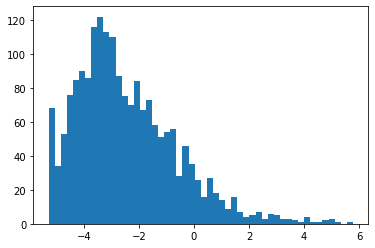

In [312]:
plt.hist(np.log(all_cells_E),bins=50)
plt.show()

In [313]:
min_e,max_e = -5,6

In [314]:
event_idx = 0

In [315]:
cell_idx,cell_E = eutils.get_event_cells(tree,event_idx)

In [316]:
cluster_cell_pos = np.array([id_to_position[x] for x in cell_idx])

In [317]:
colormap = k3d.colormaps.basic_color_maps.CoolWarm
cell_colors = k3d.helpers.map_colors(np.log(cell_E),colormap,[min_e,max_e])
cell_colors = cell_colors.astype(np.int32)

In [318]:
import k3d

In [327]:

d0,z0,theta,phi0,qoverp = eutils.get_track_parameters(tree,event_idx,0,q=1)
traj = eutils.get_track_traj(d0,z0,theta,phi0,qoverp)

In [328]:
plot = k3d.plot(name='cellgeo')

point_size = 15
plt_points = k3d.points(positions=cell_positions.astype(np.float32), point_size=point_size,color=0xff,opacity=0.1)
plot += plt_points
plt_points.shader='3d'


cell_p = k3d.points(positions=cluster_cell_pos,point_size=50,
                        colors=cell_colors.astype(np.int32))
cell_p.shader='3d'
plot += cell_p

plt_line = k3d.line(traj,shader='3d',color=0xff0000,width=0.2)
plot+=plt_line
    
plot.display()

Output()